In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param





/mnt/c/Users/jam60/OneDrive/Repos/vivaldi/back_testing


In [2]:
def load_config():
    my_config = {}
    with open('config.config') as config:
        for line in config:
            args = line.split('=')
            my_config[args[0]] = args[1].rstrip().split(',')
    return my_config

model = Trading(load_config())
dataset = model.dfs[0][0]

In [3]:

optimal = Optimal_v2(_params=[], _name='optimal')
optimal.genData(dataset, gen_new_values=False)

In [4]:
def map_to_price_entry(row):
    if row.optimal > 0.9:
        return row.close
    else:
        return None

def map_to_price_exit(row):
    if row.optimal < -0.9:
        return row.close
    else:
        return None

In [5]:
dataset['optimal_entry'] = dataset.apply(lambda x: map_to_price_entry(x), axis=1)
dataset['optimal_exit'] = dataset.apply(lambda x: map_to_price_exit(x), axis=1)

In [6]:
dataset['close'].isnull().values.any()

False

In [7]:
dataset

,time,open,high,low,close,volume,trades,optimal,optimal_entry,optimal_exit
3430226,1586908860,6869.8,6869.8,6829.5,6829.700000,41.244370,124,0.000000,NaN,NaN
3430227,1586908920,6830.4,6833.6,6817.2,6828.566667,11.972312,60,0.000000,NaN,NaN
3430228,1586908980,6828.0,6833.3,6825.0,6826.528571,40.125445,46,0.898990,NaN,NaN
3430229,1586909040,6828.9,6831.5,6828.9,6829.180000,20.698748,16,0.000000,NaN,NaN
3430230,1586909100,6831.5,6833.1,6831.5,6831.203226,11.030584,22,0.000000,NaN,NaN
3430231,1586909160,6833.0,6843.5,6833.0,6836.179365,12.356343,22,0.000000,NaN,NaN
3430232,1586909220,6845.1,6845.5,6840.5,6838.356693,0.320091,11,0.000000,NaN,NaN
3430233,1586909280,6847.0,6847.0,6844.0,6841.590980,0.309167,6,-0.414141,NaN,NaN
3430234,1586909340,6844.8,6844.8,6833.1,6839.842074,8.119441,44,0.000000,NaN,NaN
3430235,1586909400,6838.0,6838.0,6837.9,6838.870088,0.124579,3,0.000000,NaN,NaN


<Figure size 432x288 with 0 Axes>

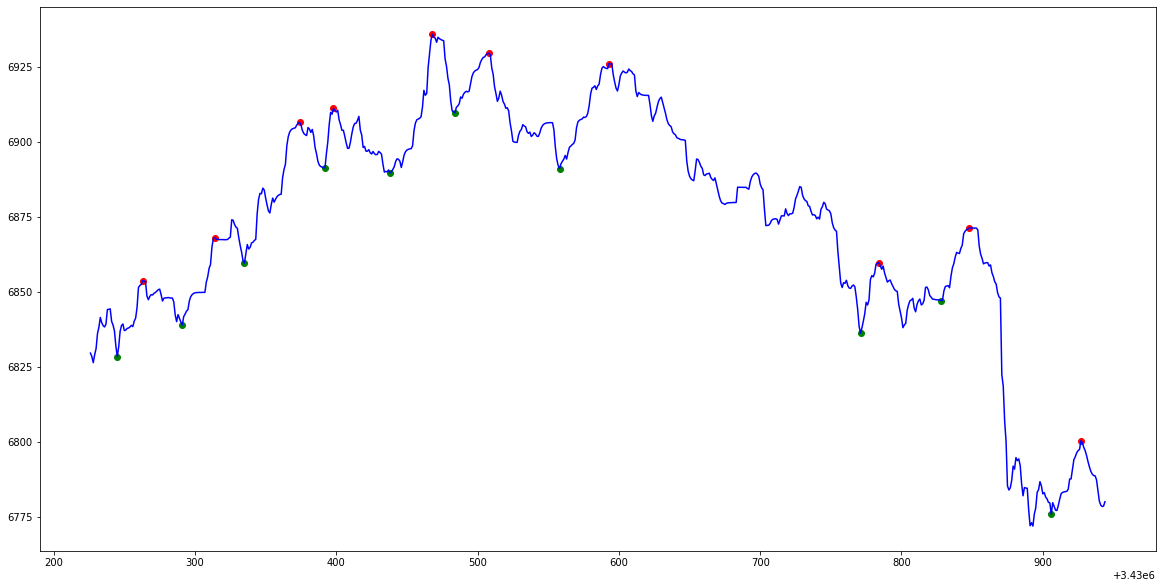

In [8]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(x=dataset.index, y=dataset['optimal_entry'], color='green')
plt.scatter(x=dataset.index, y=dataset['optimal_exit'], color='red')

plt.plot(dataset.index, dataset['close'], color='blue')
plt.show()